<a href="https://colab.research.google.com/github/AtomZa/OptizySimulation/blob/main/optizy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

import glob
import os

In [84]:
ns = 100 #smooth number
ir = 0.001 #interpolate interval

minwavelength = 200
maxwavelength = 1000
b = 1

timeinterval = 5
starttime = 1
endtime = 26

timeaxis = np.arange(starttime, endtime+timeinterval, timeinterval)
print(timeaxis)

[ 1  6 11 16 21 26]


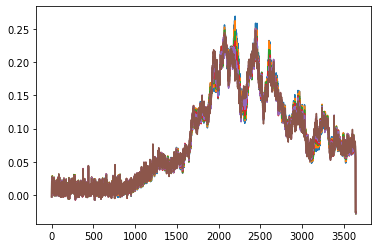

In [85]:
path = "/content/sample_data/superdata/"
filelist = glob.glob(os.path.join(path, '*.csv'))
for idx, infile in enumerate(sorted(filelist)):
        if idx < starttime: pass
        elif idx > endtime: break
        elif (idx-1) % timeinterval != 0: pass
        else:
          df = pd.read_csv(str(infile), header=None)
          df.columns = ["wavelength", "intensity"]
          df["intensity"].plot()

In [86]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

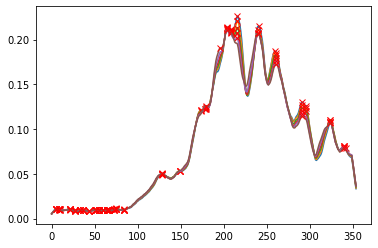

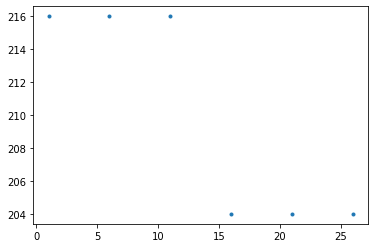

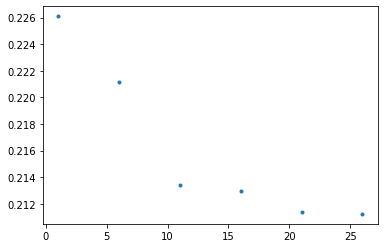

In [103]:
smootht1y_max = np.zeros(len(timeaxis))
index = np.zeros(len(timeaxis))
b = 0

for idx, infile in enumerate(sorted(filelist)):
    if idx < starttime: pass
    elif idx > endtime: break
    elif (idx-1) % timeinterval != 0: pass
    else:
        df = pd.read_csv(str(infile), header=None)
        df.columns = ["wavelength", "intensity"]
        t1x = df["wavelength"]
        t1y = df["intensity"]

        filtert1y = df.loc[(df['wavelength'] < maxwavelength) & (df['wavelength'] > minwavelength)]
        filtert1y = filtert1y['intensity'].to_numpy().flatten()
        filtert1x = np.linspace(minwavelength, maxwavelength, max(filtert1y.shape))

        smootht1y = smooth(filtert1y,ns)

        interpt1y = interp1d(filtert1x,smootht1y)
        interpt1x = np.linspace(minwavelength, maxwavelength, round(max(filtert1y.shape)*ir*100))

        smootht1y_max[b] = max(interpt1y(interpt1x))
        index[b] = np.argmax(interpt1y(interpt1x))
        b = b+1
        plt.plot(interpt1y(interpt1x))

        peaks, _ = find_peaks(interpt1y(interpt1x), distance=1)
        np.diff(peaks)
        plt.plot(peaks, interpt1y(interpt1x)[peaks], "x", color="red")

plt.show()
plt.plot(timeaxis, index, '.')
plt.show()
plt.plot(timeaxis, smootht1y_max, '.')
plt.show()